<a href="https://www.kaggle.com/code/eavprog/abscur-pred-one-one?scriptVersionId=149936301" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Прогнозирование абсолютного курса одной валюты с использованием всех имеющихся

# Загрузка библиотек

In [1]:
!pip install fedot==0.6.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.9/493.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 34.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 kB 2.9 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3.5-py3-none-any.whl size=15079 sha256=798de8e23b3358711862bd1f76157bcdc0516373a2000fa39bb83e560cc9cacd
  Stored in directory: /root

In [2]:
# Plots
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

import warnings
warnings.filterwarnings('ignore')

# Prerocessing for FEDOT
from fedot.core.data.data import InputData
from fedot.core.repository.dataset_types import DataTypesEnum
from fedot.core.repository.tasks import Task, TaskTypesEnum, TsForecastingParams

from fedot.core.data.data_split import train_test_data_setup
from fedot.core.data.multi_modal import MultiModalData

# FEDOT 
from fedot.core.pipelines.pipeline import Pipeline
from fedot.api.main import Fedot

import logging
logging.raiseExceptions = False

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random

import time
import pickle

# Импорт данных

In [4]:
abscur_data = pd.read_csv('/kaggle/input/abscur-data/abscur.csv',index_col='Date')
abscur_data

,AUD,HKD,JPY,SEK,USD,CAD,CHF,EUR,CNY,CZK,...,PKR,PLN,QAR,RON,SAR,THB,TRY,TWD,UAH,VND
Date,,,,,,,,,,,,,,,,,,,,,
2014-11-24,12.151165,1.817924,0.119199,1.896106,14.109394,12.501236,14.592299,17.549492,2.297258,0.636688,...,0.139077,4.183040,3.877805,3.957754,3.761001,0.429902,6.329353,0.455509,0.936848,0.000663
2014-11-25,12.042439,1.818228,0.119608,1.900647,14.109176,12.529916,14.631344,17.601577,2.299545,0.638592,...,0.138733,4.217107,3.877958,3.974304,3.761043,0.430158,6.358922,0.456135,0.940173,0.000660
2014-11-26,12.036767,1.816902,0.119822,1.906313,14.098466,12.527500,14.663593,17.631151,2.296652,0.639657,...,0.138628,4.220718,3.875654,3.994126,3.757286,0.430619,6.380551,0.456335,0.941593,0.000659
2014-11-27,12.051621,1.822977,0.119911,1.902090,14.136217,12.466651,14.656905,17.617528,2.302182,0.638377,...,0.138999,4.216745,3.886138,3.988212,3.767347,0.431377,6.408077,0.457557,0.944114,0.000661
2014-11-28,12.070921,1.828279,0.119437,1.907452,14.189576,12.423404,14.701364,17.669935,2.309935,0.640185,...,0.139730,4.238858,3.900807,4.003266,3.781064,0.432214,6.392277,0.458024,0.947931,0.000666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-03,14.000258,2.753052,0.144161,1.973000,21.629258,15.758842,23.950587,23.106117,2.960239,0.942743,...,0.076149,5.217779,5.942920,4.626282,5.765650,0.607973,0.761478,0.667426,0.591448,0.000888
2023-11-05,14.028703,2.754434,0.144229,1.975357,21.617396,15.762479,23.960535,23.111666,2.959783,0.942598,...,0.076107,5.214917,5.938845,4.668752,5.762488,0.607640,0.761061,0.667059,0.591124,0.000887
2023-11-06,13.984933,2.756171,0.143781,1.972849,21.603954,15.744936,23.974342,23.085486,2.965131,0.941771,...,0.075937,5.211675,5.935152,4.659338,5.761823,0.608734,0.760587,0.666645,0.590756,0.000887


# Загрузка истории

In [5]:
!cp -r /kaggle/input/abscur-pred-one-one/*.png .

In [6]:
try:
    with open("/kaggle/input/abscur-pred-one-one/history.pickle", "rb") as file:
        history = pickle.load(file)
except:
    history = []
# history

# Цикл


======================================== UAH ========================================
2023-11-09 02:27:58,186 - Unknown integration target: 
2023-11-09 02:28:06,658 - Unknown integration target: 
2023-11-09 02:28:15,043 - Unknown integration target: 
2023-11-09 02:28:22,643 - Unknown integration target: 
2023-11-09 02:28:30,665 - Unknown integration target: 
2023-11-09 02:28:48,325 - Unknown integration target: 
2023-11-09 02:29:06,606 - Unknown integration target: 
2023-11-09 02:29:26,772 - Unknown integration target: 
2023-11-09 02:29:29,240 - Unknown integration target: 
2023-11-09 02:29:29,243 - Unknown integration target: 
2023-11-09 02:29:39,199 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 261.7 MiB, max: 262.6 MiB
2023-11-09 02:29:39,202 - ApiComposer - Initial pipeline was fitted in 7.3 sec.
2023-11-09 02:29:39,207 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
20

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 02:41:55,382 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:16<?, ?gen/s]

2023-11-09 02:41:55,410 - ApiComposer - Hyperparameters tuning started with 9 min. timeout


2023-11-09 02:42:03,304 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/UAH, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/UAH - {}
ridge - {'alpha': 1.2802348296233999}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.000
  0%|          | 36/100000 [07:13<462:52:06, 16.67s/trial, best loss: 0.00043086781052917165]
2023-11-09 02:50:52,783 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/UAH, ridge, sparse_lagged]}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/UAH - {}
ridge - {'alpha': 1.2802348296233999}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
2023-11-09 02:50:52,787 - PipelineTuner - Final metric: 0.000
2023-11-09 02:50:52,795 - ApiComposer - Hyperparameters tuning finished
202

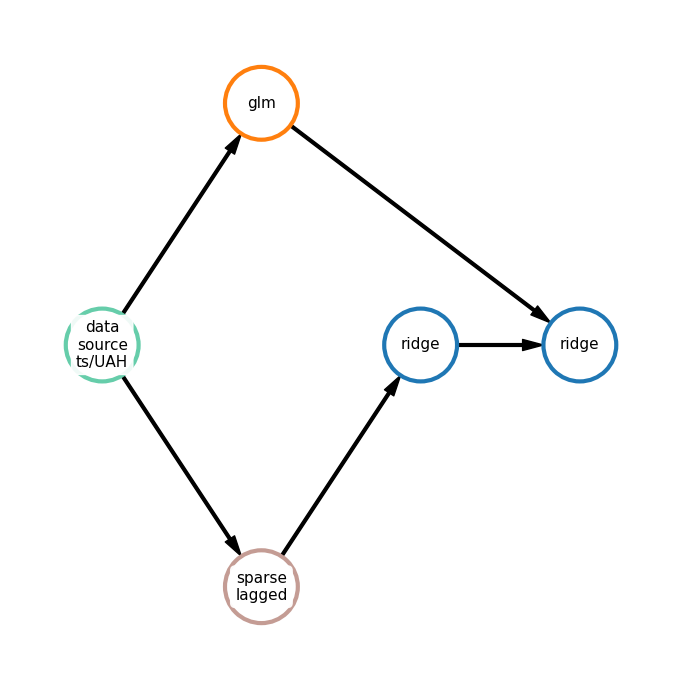

[0.65006421 0.65019768]
{'mae': 0.003, 'mape': 0.005}


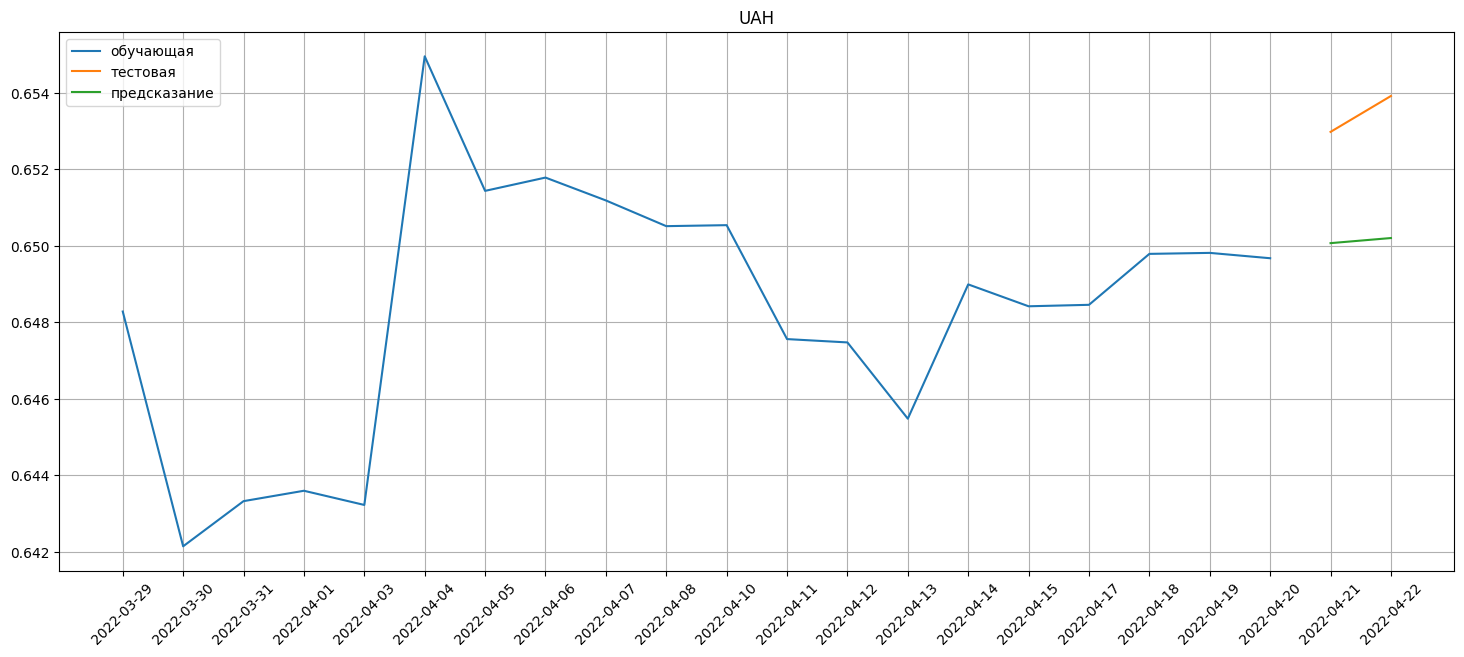


======================================== EUR ========================================
2023-11-09 02:51:31,177 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.3 MiB, max: 3.1 MiB
2023-11-09 02:51:31,183 - ApiComposer - Initial pipeline was fitted in 17.6 sec.
2023-11-09 02:51:31,189 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 02:51:31,212 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 19 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 03:02:20,274 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:49<?, ?gen/s]

2023-11-09 03:02:20,302 - ApiComposer - Hyperparameters tuning started with 8 min. timeout


2023-11-09 03:02:37,472 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/EUR]}
ridge - {'alpha': 5.793740702685379}
lagged - {'window_size': 5.857272576055662}
data_source_ts/EUR - {} 
Initial metric: 0.056
  0%|          | 24/100000 [07:28<541:24:17, 19.50s/trial, best loss: 0.05453000208624041]
2023-11-09 03:10:41,627 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/EUR]}
ridge - {'alpha': 1.092063173324746}
lagged - {'window_size': 175}
data_source_ts/EUR - {}
2023-11-09 03:10:41,639 - PipelineTuner - Final metric: 0.055
2023-11-09 03:10:41,648 - ApiComposer - Hyperparameters tuning finished
2023-11-09 03:10:42,239 - ApiComposer - Model generation finished
2023-11-09 03:10:57,939 - FEDOT logger - Final pipeline was fitted
2023-11-09 03:10:57,945 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/EUR]}
ridge - {'alpha': 1.092063173324

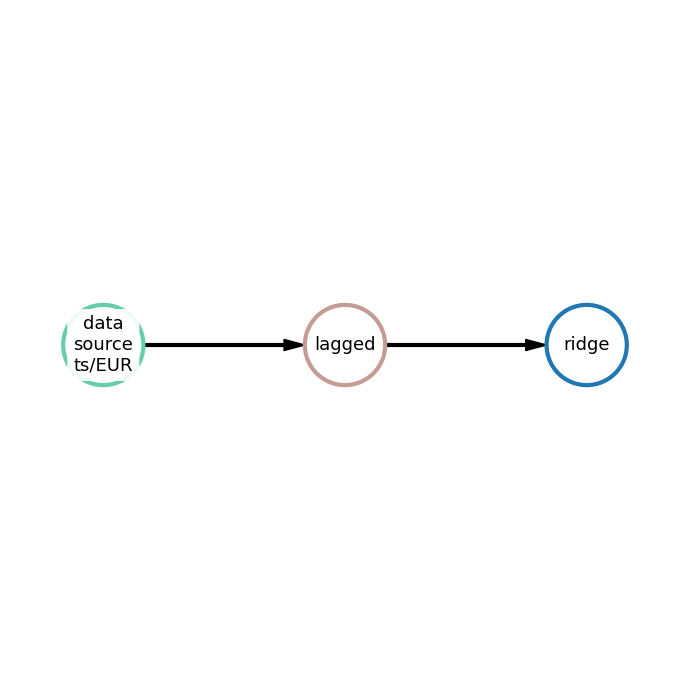

[23.15681713 23.11867596 23.11443812 23.11001465 23.10014651 23.1093631
 23.09796386]
{'mae': 0.053, 'mape': 0.002}


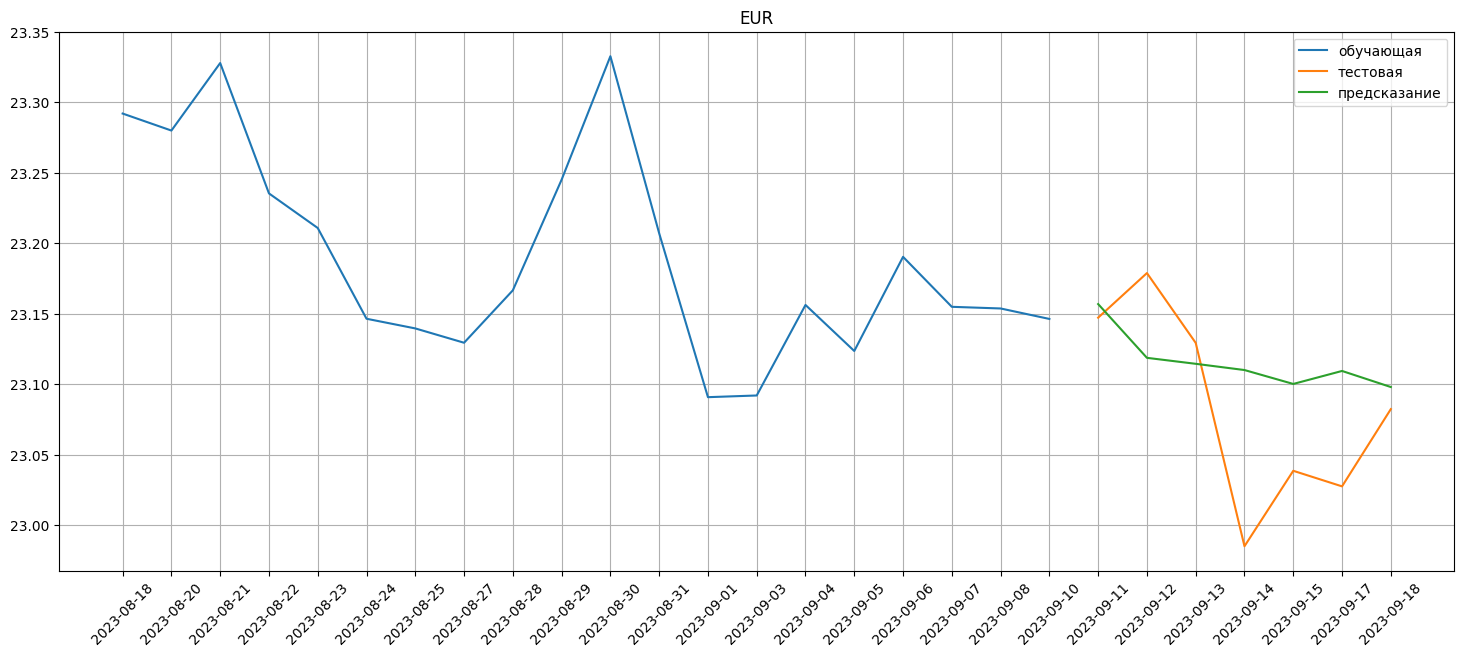


======================================== DKK ========================================
2023-11-09 03:11:18,887 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.0 MiB
2023-11-09 03:11:18,891 - ApiComposer - Initial pipeline was fitted in 8.8 sec.
2023-11-09 03:11:18,895 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 03:11:18,917 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 58 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non_

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 03:30:28,805 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [19:09<?, ?gen/s]

2023-11-09 03:30:28,843 - ApiComposer - Hyperparameters tuning started with 39 min. timeout


2023-11-09 03:32:36,278 - PipelineTuner - Initial pipeline: {'depth': 14, 'length': 15, 'nodes': [svr, rfr, rfr, ridge, ridge, glm, data_source_ts/DKK, rfr, lagged, linear, decompose, linear, decompose, linear, decompose]}
svr - {}
rfr - {'n_jobs': -1}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/DKK - {}
rfr - {'n_jobs': -1}
lagged - {'window_size': 10}
linear - {}
decompose - {}
linear - {}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.006
  0%|          | 14/100000 [15:37<6510:58:20, 234.43s/trial, best loss: 0.010234835389063899]
2023-11-09 04:13:16,041 - PipelineTuner - Final pipeline: {'depth': 14, 'length': 15, 'nodes': [svr, rfr, rfr, ridge, ridge, glm, data_source_ts/DKK, rfr, lagged, linear, decompose, linear, decompose, linear, decompose]}
svr - {}
rfr - {'n_jobs': -1}
rfr - {'n_jobs': -1}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/DKK - {}
rfr - {'n_jobs':

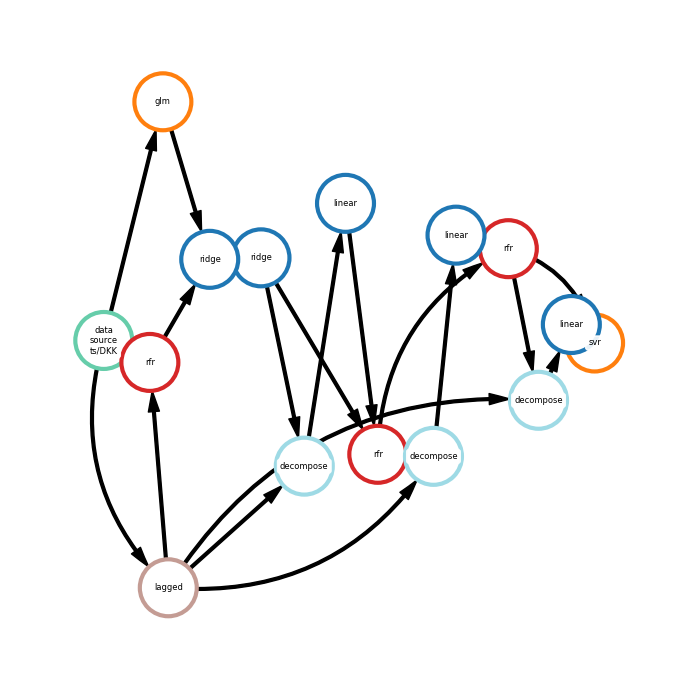

[2.89760028 2.89667773 2.89761002 2.8949368 ]
{'mae': 0.005, 'mape': 0.002}


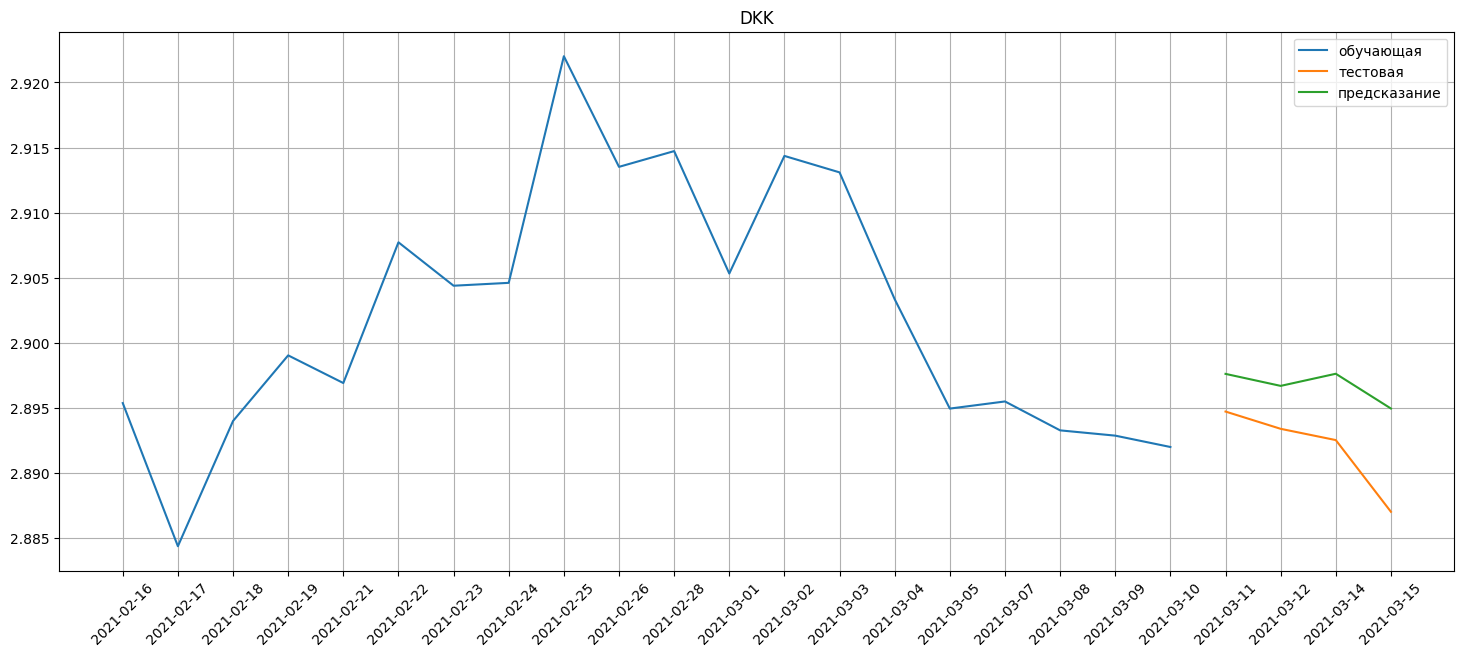


======================================== VND ========================================
2023-11-09 04:16:43,693 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.5 MiB
2023-11-09 04:16:43,699 - ApiComposer - Initial pipeline was fitted in 14.5 sec.
2023-11-09 04:16:43,704 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-09 04:16:43,740 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 3 min. Set of candidate models: ['ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'gaussian_filter', 'sparse_lagged', 'cut', 'ets', 'lagged', 'ts_naive_average', 'ar', 'dtreg', 'rfr', 'adareg', 'locf', 'normalization', 'scaling', 'ets', 'polyfit', 'lagged', 'linear', 'ransac_non_lin_reg', 'ridge', 'smoothing', 'glm', 'pca', 'diff_filter', 'sgdr', 'lasso', 'sparse_lagged', 'ransac_lin_reg', 'gaussian_filter', 'cut', 'ts_naive_average'].
2023-11-09

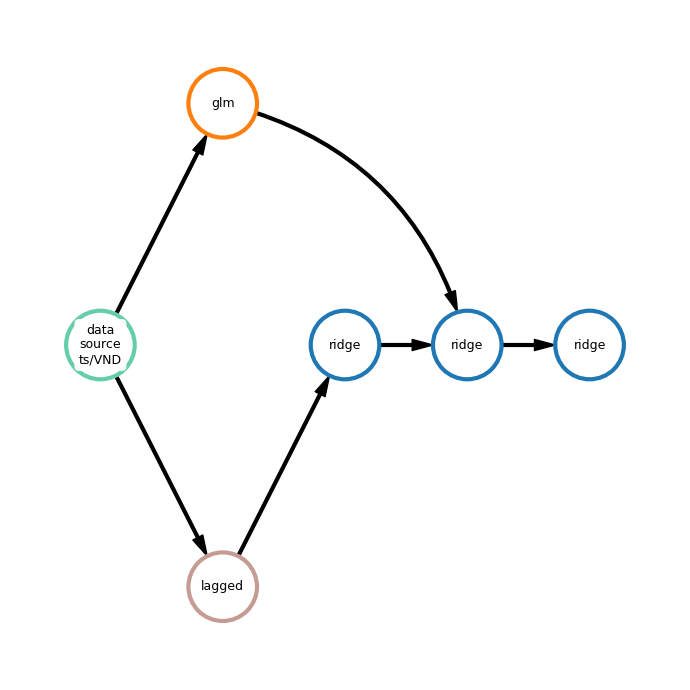

[0.00074955 0.0007496  0.00074966 0.00074971 0.00074976 0.00074981
 0.00074986]
{'mae': 0.0, 'mape': 0.062}


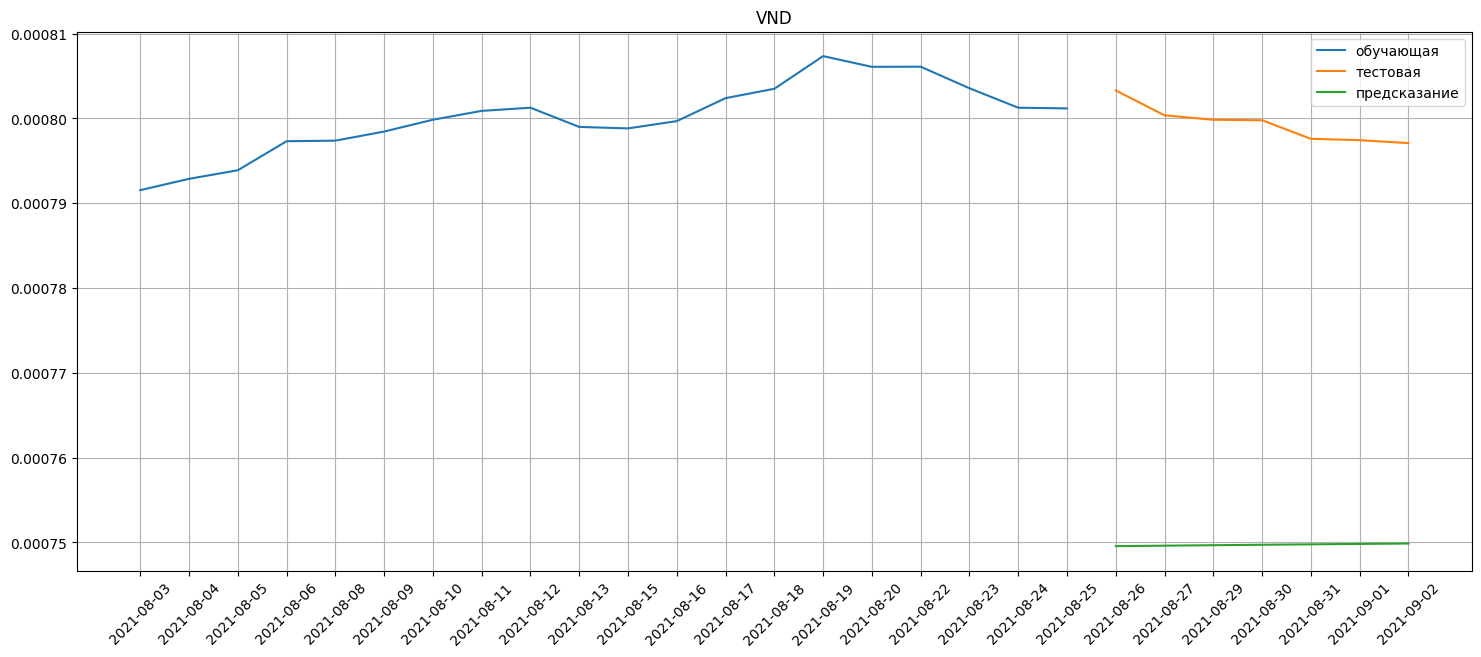


======================================== KRW ========================================
2023-11-09 04:20:25,190 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.1 MiB
2023-11-09 04:20:25,198 - ApiComposer - Initial pipeline was fitted in 18.8 sec.
2023-11-09 04:20:25,204 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 04:20:25,235 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 48 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 04:40:00,162 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [19:34<?, ?gen/s]

2023-11-09 04:40:00,202 - ApiComposer - Hyperparameters tuning started with 28 min. timeout


2023-11-09 04:40:25,388 - PipelineTuner - Initial pipeline: {'depth': 5, 'length': 6, 'nodes': [linear, adareg, ridge, glm, data_source_ts/KRW, lagged]}
linear - {}
adareg - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/KRW - {}
lagged - {'window_size': 10} 
Initial metric: 0.000
  0%|          | 46/100000 [23:13<1074:43:57, 38.71s/trial, best loss: 0.0001235199410613019]
2023-11-09 05:09:15,033 - PipelineTuner - Final pipeline: {'depth': 5, 'length': 6, 'nodes': [linear, adareg, ridge, glm, data_source_ts/KRW, lagged]}
linear - {}
adareg - {'learning_rate': 0.16200763470839674, 'loss': 'linear'}
ridge - {'alpha': 0.658734828854566}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/KRW - {}
lagged - {'window_size': 27}
2023-11-09 05:09:15,038 - PipelineTuner - Final metric: 0.000
2023-11-09 05:09:15,045 - ApiComposer - Hyperparameters tuning finished
2023-11-09 05:09:15,660 - ApiComposer - Model generation finished
2023-11-09 05:09:48,722 - FEDOT l

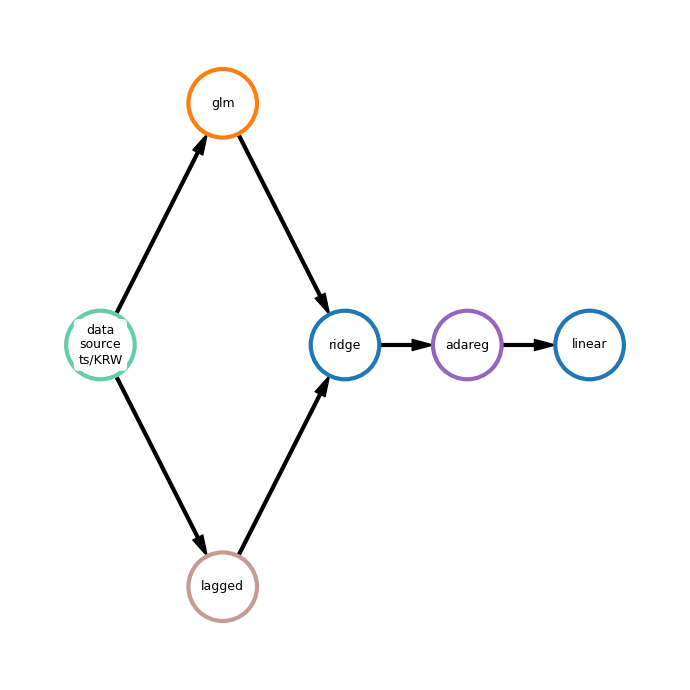

[0.01620316 0.01619909 0.0161947  0.01618844 0.01618185 0.01617593
 0.01616961 0.01616271 0.01615502 0.01614928 0.01614286 0.01613706
 0.01613208]
{'mae': 0.0, 'mape': 0.009}


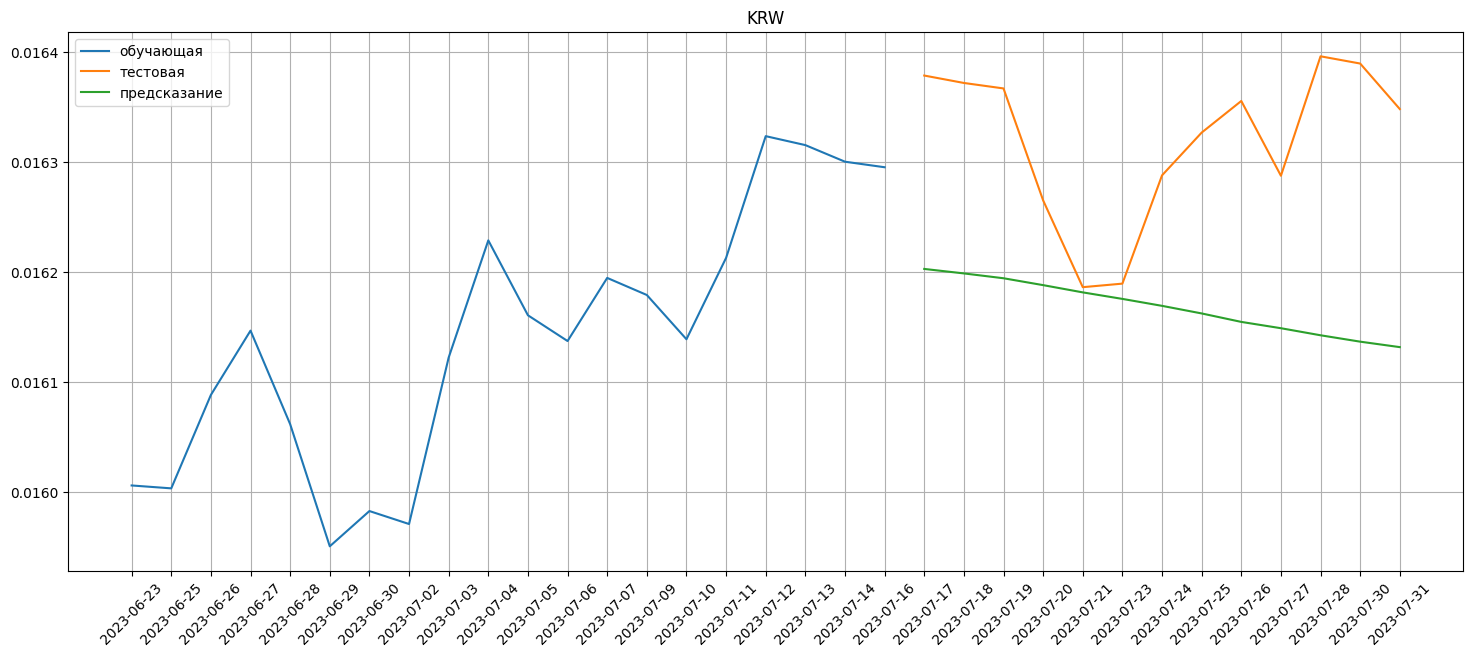


======================================== UAH ========================================
2023-11-09 05:10:45,141 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.5 MiB
2023-11-09 05:10:45,150 - ApiComposer - Initial pipeline was fitted in 20.0 sec.
2023-11-09 05:10:45,155 - AssumptionsHandler - Preset was changed to fast_train due to fit time estimation for initial model.
2023-11-09 05:10:45,180 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 5 min. Set of candidate models: ['ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'gaussian_filter', 'sparse_lagged', 'cut', 'ets', 'lagged', 'ts_naive_average', 'ar', 'dtreg', 'rfr', 'adareg', 'locf', 'normalization', 'scaling', 'ets', 'polyfit', 'lagged', 'linear', 'ransac_non_lin_reg', 'ridge', 'smoothing', 'glm', 'pca', 'diff_filter', 'sgdr', 'lasso', 'sparse_lagged', 'ransac_lin_reg', 'gaussian_filter', 'cut', 'ts_naive_average'].
2023-11-09

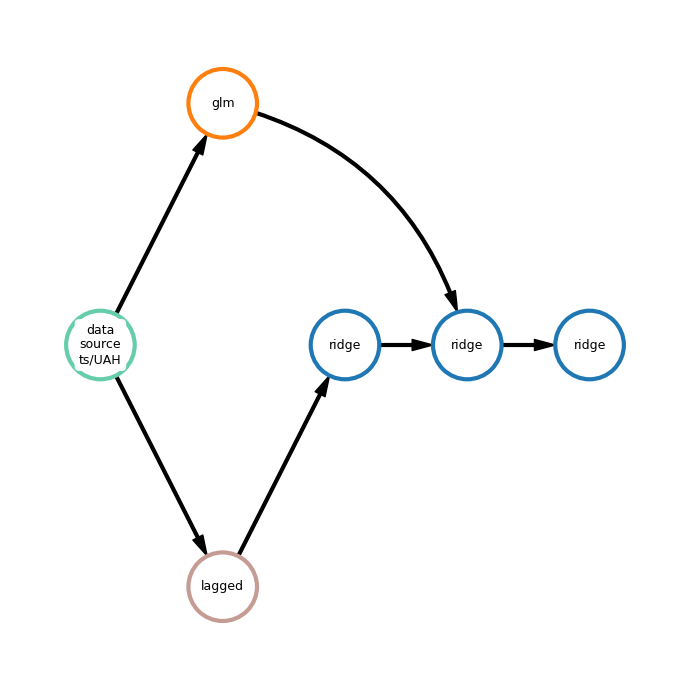

[0.59094938 0.5915264  0.59214092 0.59282253]
{'mae': 0.002, 'mape': 0.004}


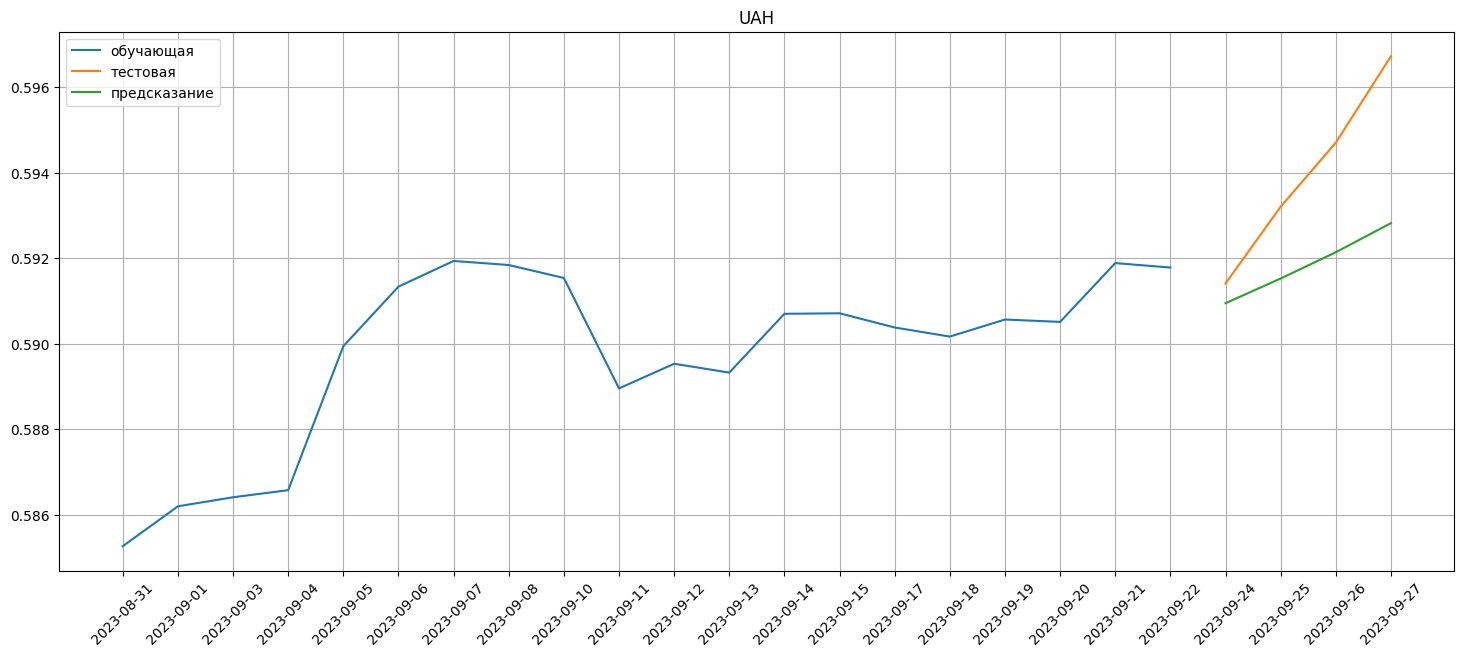


======================================== BRL ========================================
2023-11-09 05:16:26,435 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.5 MiB
2023-11-09 05:16:26,442 - ApiComposer - Initial pipeline was fitted in 16.2 sec.
2023-11-09 05:16:26,448 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 05:16:26,487 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 23 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 05:28:52,874 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:26<?, ?gen/s]

2023-11-09 05:28:52,903 - ApiComposer - Hyperparameters tuning started with 10 min. timeout


2023-11-09 05:29:33,656 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [gbr, gbr, glm, data_source_ts/BRL, sparse_lagged]}
gbr - {}
gbr - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/BRL - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.091
 50%|█████     | 5/10 [12:46<12:46, 153.40s/trial, best loss: 0.40419937423796237]
2023-11-09 05:42:20,763 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-09 05:44:30,445 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [gbr, gbr, glm, data_source_ts/BRL, sparse_lagged]}
gbr - {}
gbr - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/BRL - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
2023-11-09 05:44:30,448 - PipelineTuner - Final metric: 0.091
2023-11-09 05:44:30,459 - ApiComposer - Hyperparameters

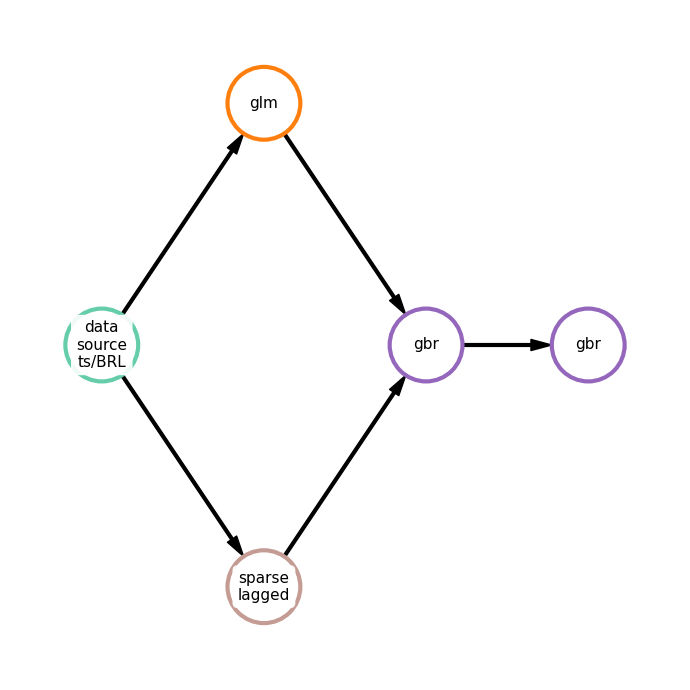

[3.86642963 3.8701243  3.87240395 3.85065061 3.83603415 3.85499638
 3.86398558 3.87225505 3.87573652 3.82979914 3.80952957]
{'mae': 0.071, 'mape': 0.018}


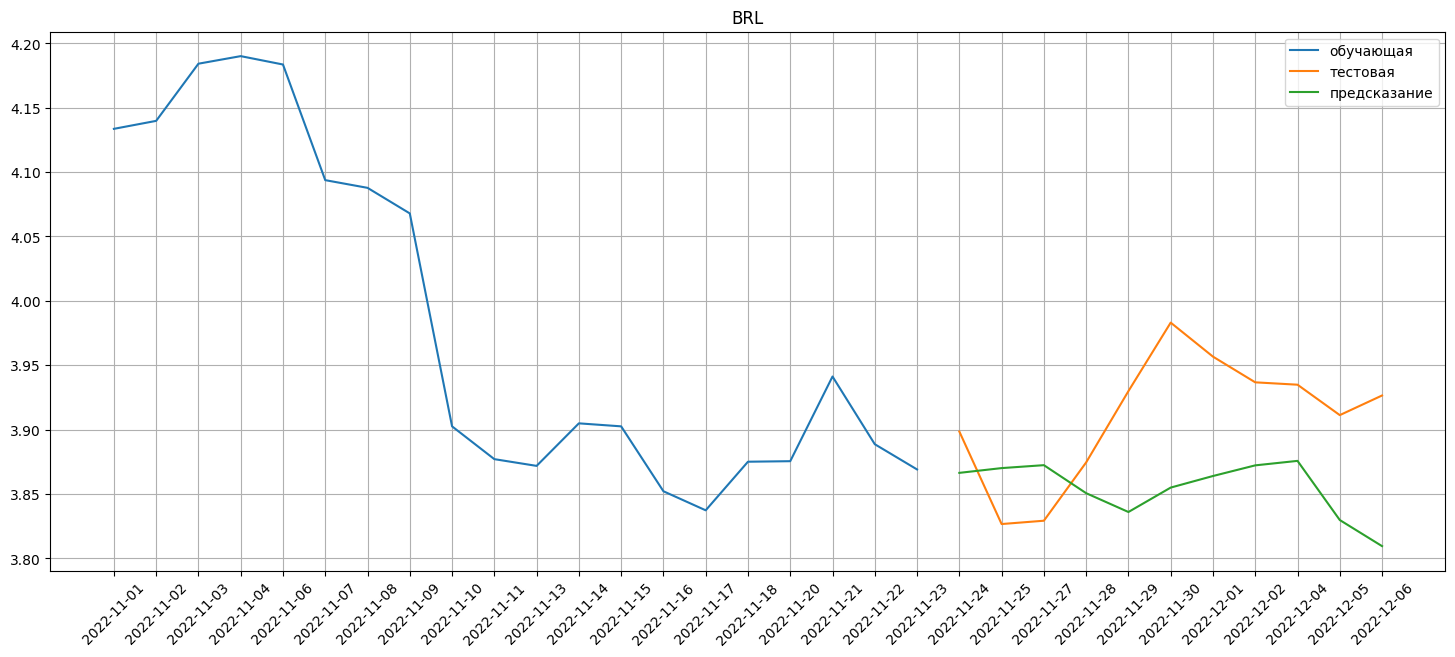


======================================== COP ========================================
2023-11-09 05:45:41,824 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.8 MiB
2023-11-09 05:45:41,829 - ApiComposer - Initial pipeline was fitted in 16.4 sec.
2023-11-09 05:45:41,833 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 05:45:41,855 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 28 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 06:02:40,997 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [16:59<?, ?gen/s]

2023-11-09 06:02:41,032 - ApiComposer - Hyperparameters tuning started with 11 min. timeout


2023-11-09 06:03:22,548 - PipelineTuner - Initial pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/COP, ridge, lagged, linear, decompose]}
treg - {'max_features': 0.9880639894711846, 'min_samples_split': 4, 'min_samples_leaf': 3, 'bootstrap': False}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/COP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.000
  0%|          | 13/100000 [02:52<1596:51:57, 57.49s/trial, best loss: 3.0737665778887635e-05]
2023-11-09 06:14:27,615 - PipelineTuner - Final pipeline: {'depth': 8, 'length': 9, 'nodes': [treg, ridge, ridge, glm, data_source_ts/COP, ridge, lagged, linear, decompose]}
treg - {'max_features': 0.9880639894711846, 'min_samples_split': 4, 'min_samples_leaf': 3, 'bootstrap': False}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/COP - {}
ridge - {}
lagged - {'window_size': 10}
linear - {}
d

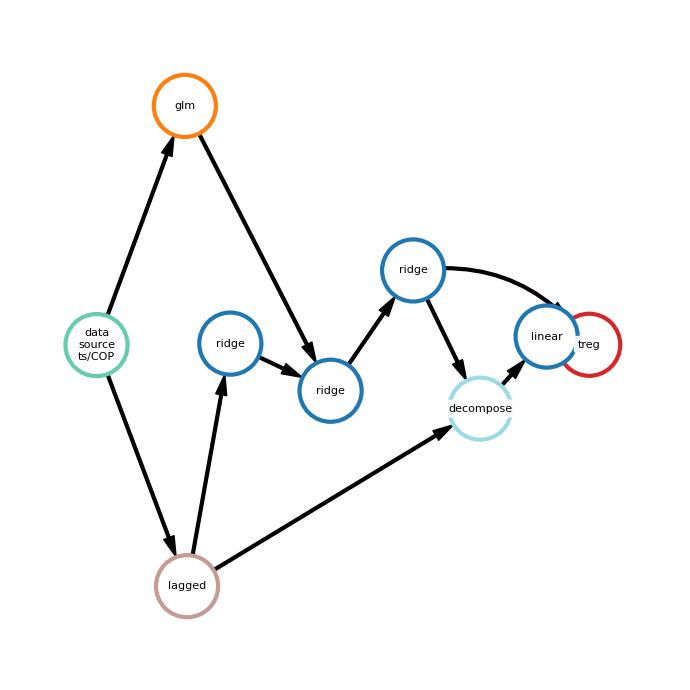

[0.00432713 0.00432735 0.00432246 0.00432324 0.0043156  0.00432017]
{'mae': 0.0, 'mape': 0.022}


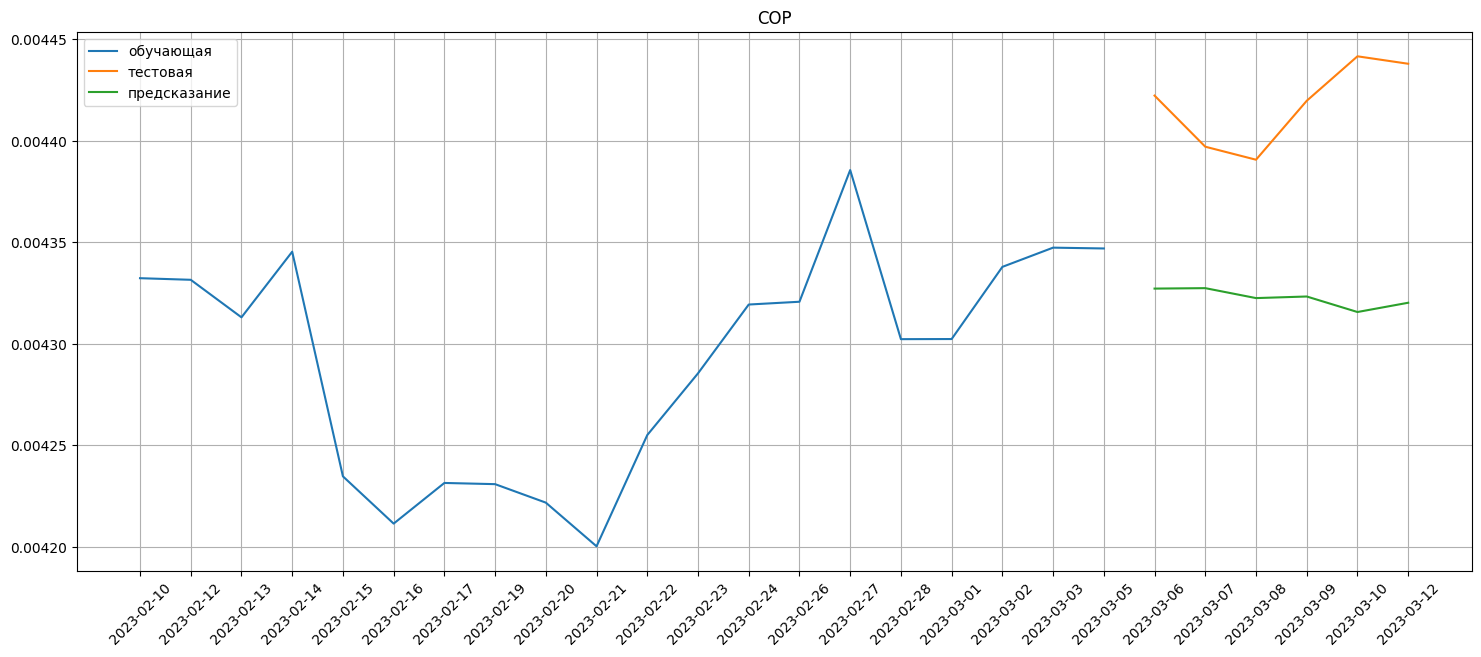


======================================== CHF ========================================
2023-11-09 06:15:56,371 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 3.7 MiB
2023-11-09 06:15:56,378 - ApiComposer - Initial pipeline was fitted in 16.7 sec.
2023-11-09 06:15:56,384 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 06:15:56,415 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 17 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 06:25:37,244 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [09:40<?, ?gen/s]

2023-11-09 06:25:37,284 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-09 06:25:51,611 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/CHF]}
ridge - {'alpha': 3.7616768237961056}
lagged - {'window_size': 16.426570405278646}
data_source_ts/CHF - {} 
Initial metric: 0.137
  0%|          | 22/100000 [06:48<540:38:51, 19.47s/trial, best loss: 0.07629966262606144]
2023-11-09 06:33:18,097 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/CHF]}
ridge - {'alpha': 9.611603060482741}
lagged - {'window_size': 483}
data_source_ts/CHF - {}
2023-11-09 06:33:18,108 - PipelineTuner - Final metric: 0.076
2023-11-09 06:33:18,120 - ApiComposer - Hyperparameters tuning finished
2023-11-09 06:33:18,642 - ApiComposer - Model generation finished
2023-11-09 06:33:40,095 - FEDOT logger - Final pipeline was fitted
2023-11-09 06:33:40,102 - FEDOT logger - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [ridge, lagged, data_source_ts/CHF]}
ridge - {'alpha': 9.6116030604

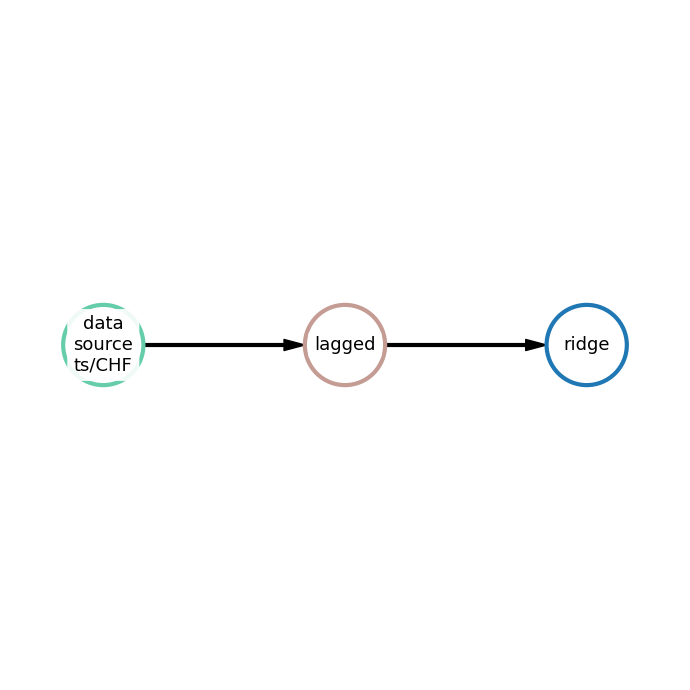

[22.03727313 22.03550537 22.03220724 22.04039537 22.0455732  22.06844242
 22.077999   22.09784108 22.09513672 22.06887296 22.04748965 22.04362558]
{'mae': 0.104, 'mape': 0.005}


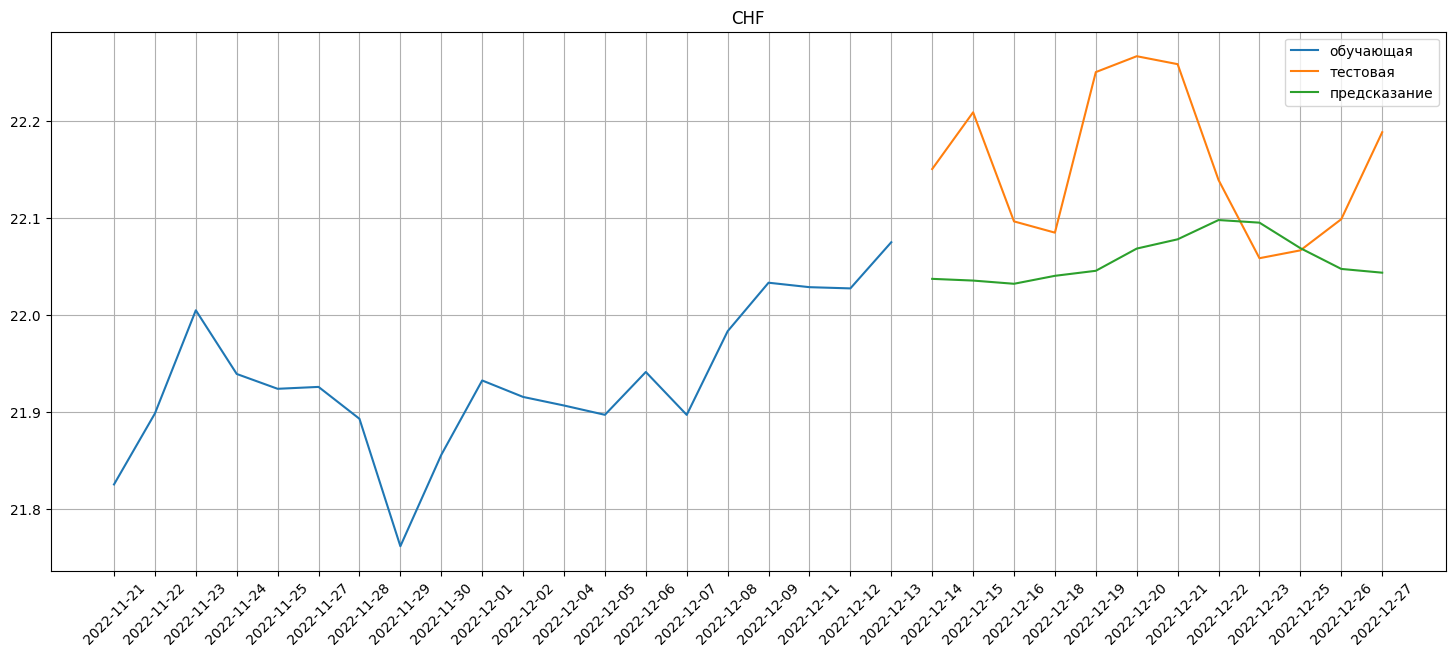


======================================== RUB ========================================
2023-11-09 06:34:03,202 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.1 MiB
2023-11-09 06:34:03,207 - ApiComposer - Initial pipeline was fitted in 14.7 sec.
2023-11-09 06:34:03,211 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 06:34:03,235 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 9 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non_

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 06:39:15,184 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [05:11<?, ?gen/s]

2023-11-09 06:39:15,223 - ApiComposer - Hyperparameters tuning started with 4 min. timeout


2023-11-09 06:39:27,974 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [dtreg, linear, ridge, glm, data_source_ts/RUB, dtreg, sparse_lagged]}
dtreg - {}
linear - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RUB - {}
dtreg - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False} 
Initial metric: 0.038
  0%|          | 13/100000 [01:17<719:50:55, 25.92s/trial, best loss: 0.03847174446339236]
2023-11-09 06:43:08,072 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [dtreg, linear, ridge, glm, data_source_ts/RUB, dtreg, sparse_lagged]}
dtreg - {}
linear - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/RUB - {}
dtreg - {}
sparse_lagged - {'window_size': 10, 'n_components': 0.5, 'sparse_transform': True, 'use_svd': False}
2023-11-09 06:43:08,077 - PipelineTuner - Final metric: 0.038
2023-11-09 06:43:08,084 - ApiComposer - Hyperparameters 

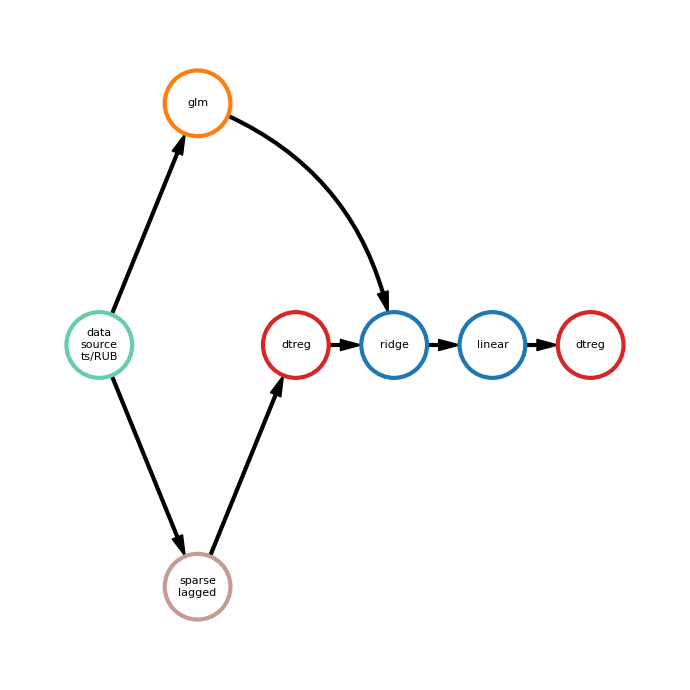

[0.21509102 0.21881943 0.22141625 0.22150724 0.21657646 0.21059907
 0.21678391 0.21688096 0.21405302 0.21401566]
{'mae': 0.048, 'mape': 0.293}


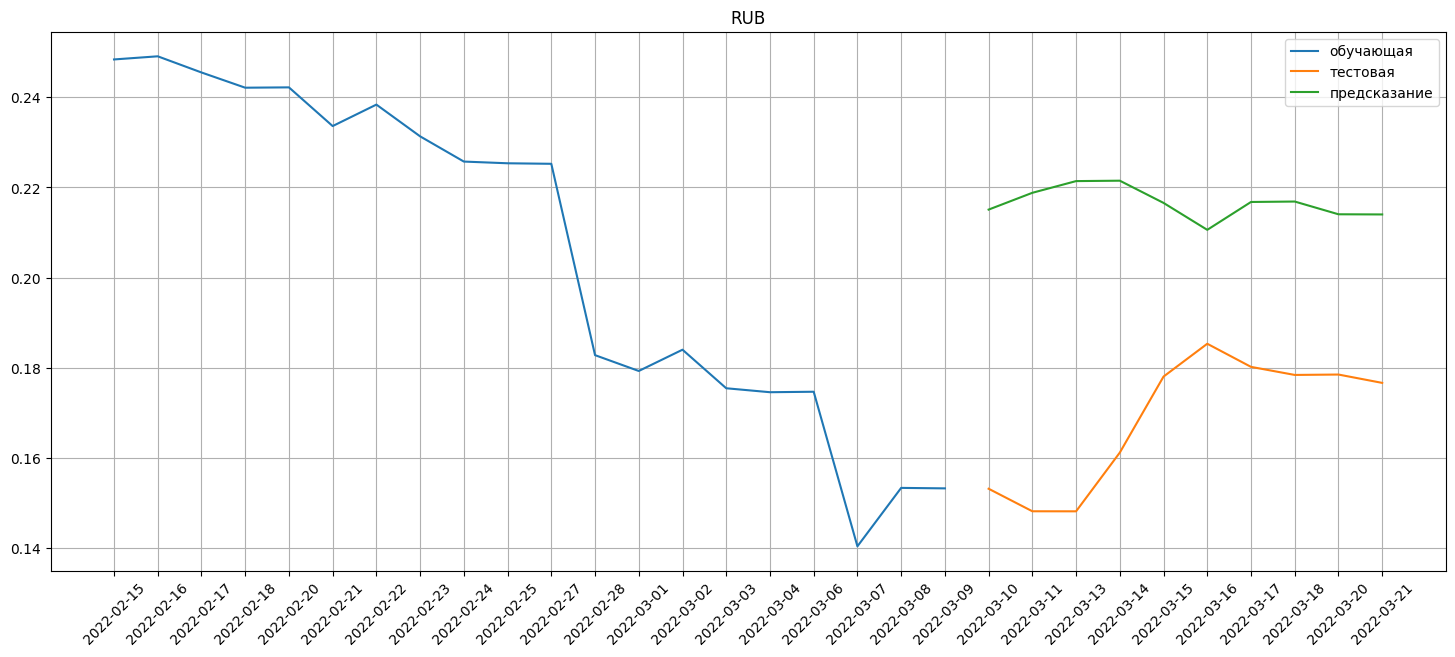


======================================== CHF ========================================
2023-11-09 06:43:48,381 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 2.3 MiB
2023-11-09 06:43:48,386 - ApiComposer - Initial pipeline was fitted in 15.6 sec.
2023-11-09 06:43:48,391 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 06:43:48,418 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 33 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]

2023-11-09 06:59:27,578 - GroupedCondition - Optimisation finished: Early stopping timeout criteria was satisfied


Generations:   0%|          | 1/10000 [15:39<?, ?gen/s]

2023-11-09 06:59:27,603 - ApiComposer - Hyperparameters tuning started with 17 min. timeout


2023-11-09 07:00:03,487 - PipelineTuner - Initial pipeline: {'depth': 3, 'length': 3, 'nodes': [rfr, stl_arima, data_source_ts/CHF]}
rfr - {'n_jobs': -1}
stl_arima - {'p': 6, 'd': 2, 'q': 4, 'period': 211}
data_source_ts/CHF - {} 
Initial metric: 0.255
  0%|          | 46/100000 [10:37<491:27:10, 17.70s/trial, best loss: 0.18962016001798523]
2023-11-09 07:16:46,527 - PipelineTuner - Final pipeline: {'depth': 3, 'length': 3, 'nodes': [rfr, stl_arima, data_source_ts/CHF]}
rfr - {'n_jobs': -1, 'bootstrap': True, 'max_features': 0.5090938415275026, 'min_samples_leaf': 13, 'min_samples_split': 8}
stl_arima - {'d': 1, 'p': 5, 'period': 148, 'q': 1}
data_source_ts/CHF - {}
2023-11-09 07:16:46,533 - PipelineTuner - Final metric: 0.190
2023-11-09 07:16:46,544 - ApiComposer - Hyperparameters tuning finished
2023-11-09 07:16:47,325 - ApiComposer - Model generation finished
2023-11-09 07:16:50,537 - FEDOT logger - Final pipeline was fitted
2023-11-09 07:16:50,542 - FEDOT logger - Final pipeline: {

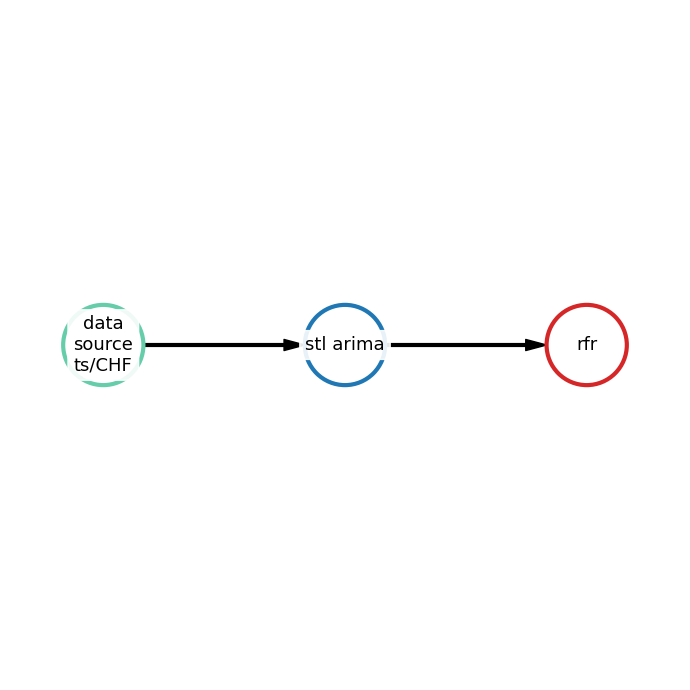

[20.4853217  20.48045181 20.4710276  20.46438524]
{'mae': 0.154, 'mape': 0.007}


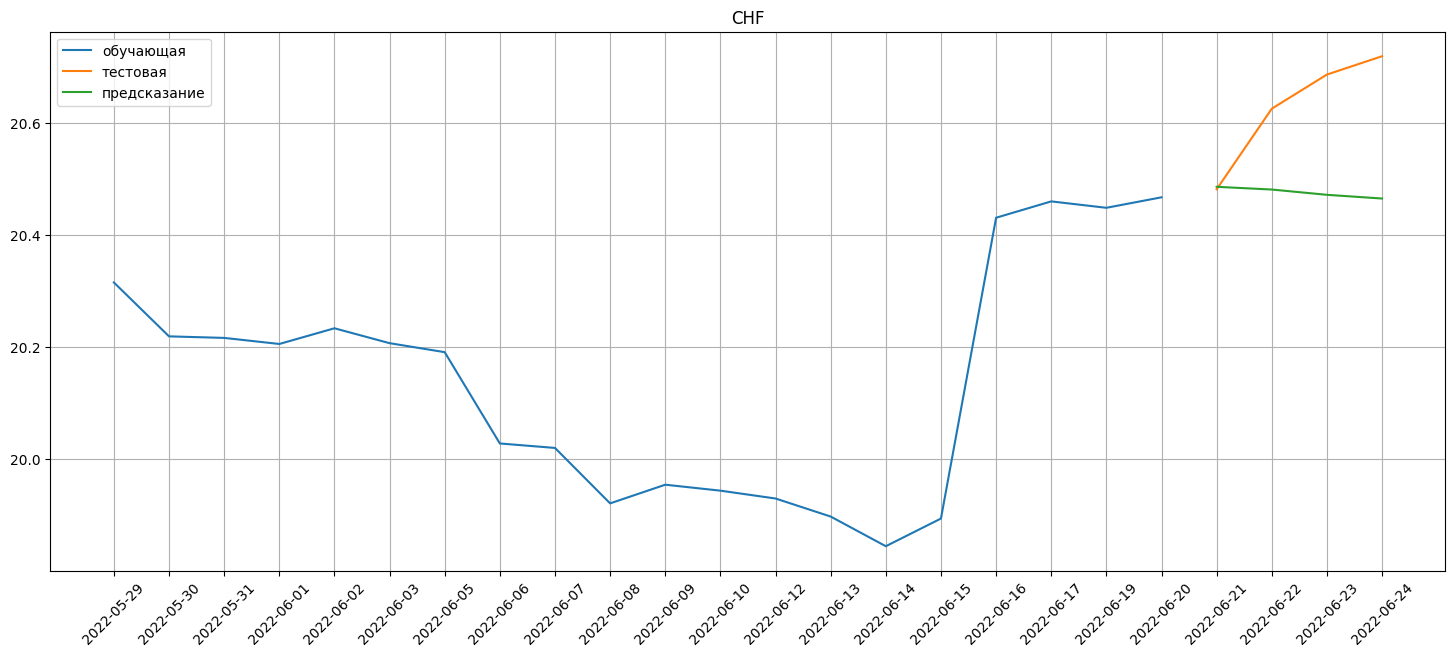


======================================== SGD ========================================
2023-11-09 07:17:31,964 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.2 MiB, max: 4.2 MiB
2023-11-09 07:17:31,971 - ApiComposer - Initial pipeline was fitted in 21.0 sec.
2023-11-09 07:17:31,976 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 07:17:32,034 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 17 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 07:27:11,782 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [09:39<?, ?gen/s]

2023-11-09 07:27:11,816 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-09 07:27:36,474 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, fast_ica, ridge, arima, data_source_ts/SGD, ridge, lagged]}
ridge - {}
fast_ica - {'whiten': 'unit-variance'}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/SGD - {}
ridge - {}
lagged - {'window_size': 10} 
Initial metric: 0.029
  0%|          | 16/100000 [03:06<864:14:51, 31.12s/trial, best loss: 0.024253353809022923] 
2023-11-09 07:35:35,553 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [ridge, fast_ica, ridge, arima, data_source_ts/SGD, ridge, lagged]}
ridge - {'alpha': 7.5687182703644975}
fast_ica - {'whiten': 'unit-variance', 'fun': 'logcosh', 'n_components': 14}
ridge - {'alpha': 4.596755575958361}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/SGD - {}
ridge - {'alpha': 6.830130929522656}
lagged - {'window_size': 10}
2023-11-09 07:35:35,560 - PipelineTuner - Final metric: 0.024
2023-11-09 07:35:35,566 - ApiComposer - Hyperparameters tuning fi

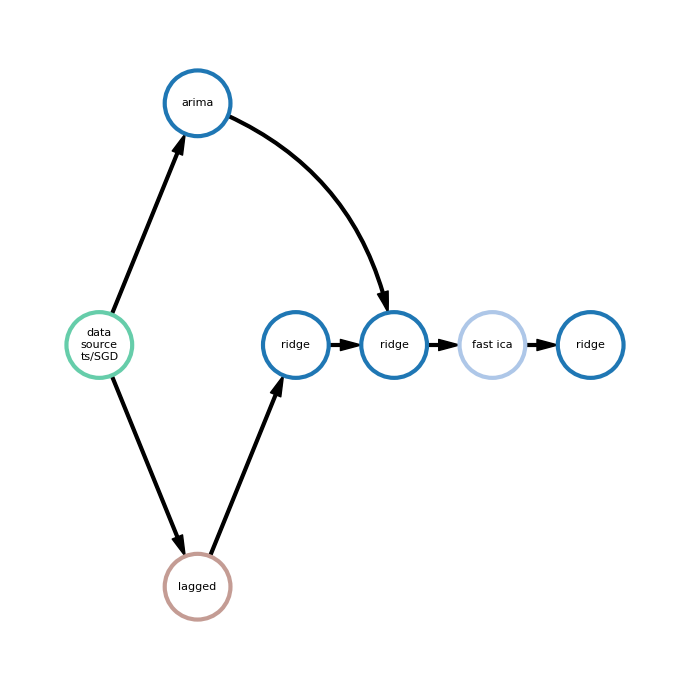

[15.47218178 15.47340074 15.47303281 15.47240415 15.47175878 15.47129069
 15.47065643 15.46999365 15.4692947  15.46882537 15.46812527 15.46753378
 15.46698752 15.47096814]
{'mae': 0.069, 'mape': 0.004}


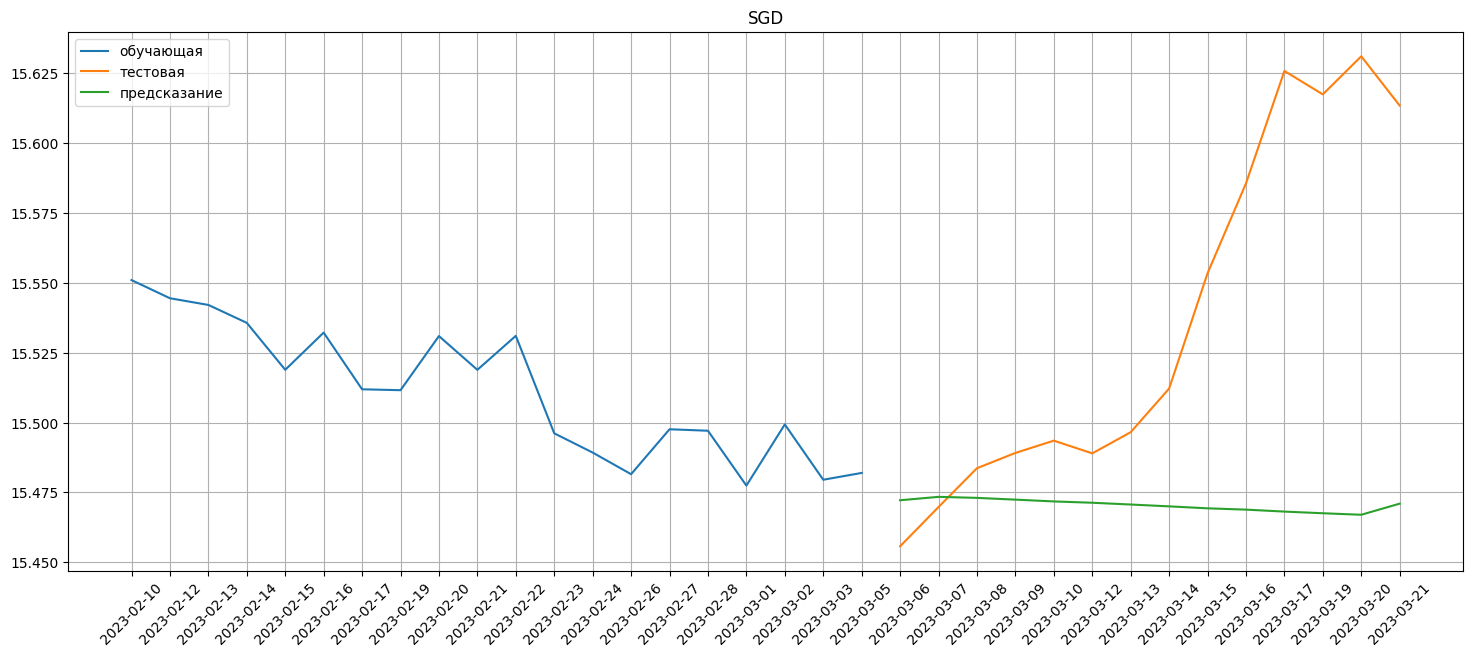


======================================== NOK ========================================
2023-11-09 07:36:18,428 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 3.7 MiB
2023-11-09 07:36:18,437 - ApiComposer - Initial pipeline was fitted in 11.9 sec.
2023-11-09 07:36:18,442 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 07:36:18,473 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 17 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 07:48:36,411 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [12:17<?, ?gen/s]

2023-11-09 07:48:36,440 - ApiComposer - Hyperparameters tuning started with 5 min. timeout


2023-11-09 07:48:44,508 - PipelineTuner - Initial pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/NOK, ridge, lagged]}
ridge - {}
glm - {'family': 'gamma', 'link': 'log'}
data_source_ts/NOK - {}
ridge - {'alpha': 6.568394338876499}
lagged - {'window_size': 8.43638222252555} 
Initial metric: 0.021
  0%|          | 23/100000 [03:02<389:10:57, 14.01s/trial, best loss: 0.020129027880953866]
2023-11-09 07:53:29,089 - PipelineTuner - Final pipeline: {'depth': 4, 'length': 5, 'nodes': [ridge, glm, data_source_ts/NOK, ridge, lagged]}
ridge - {'alpha': 0.21989524886764375}
glm - {'family': 'inverse_gaussian', 'link': 'inverse_power'}
data_source_ts/NOK - {}
ridge - {'alpha': 3.7573998112917333}
lagged - {'window_size': 273}
2023-11-09 07:53:29,096 - PipelineTuner - Final metric: 0.020
2023-11-09 07:53:29,104 - ApiComposer - Hyperparameters tuning finished
2023-11-09 07:53:29,746 - ApiComposer - Model generation finished
2023-11-09 07:53:43,596 - FEDOT logger - Final pip

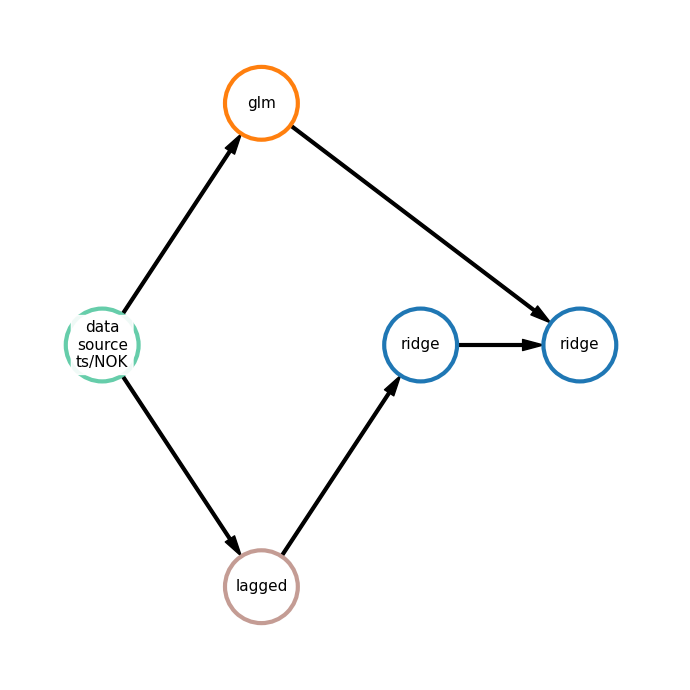

[2.0890097  2.08902772 2.08915431 2.08938427 2.08970197 2.09010642
 2.09066495 2.09129085 2.09200751 2.09271256 2.09339567 2.09405749
 2.09459697 2.09499905 2.09527764]
{'mae': 0.015, 'mape': 0.007}


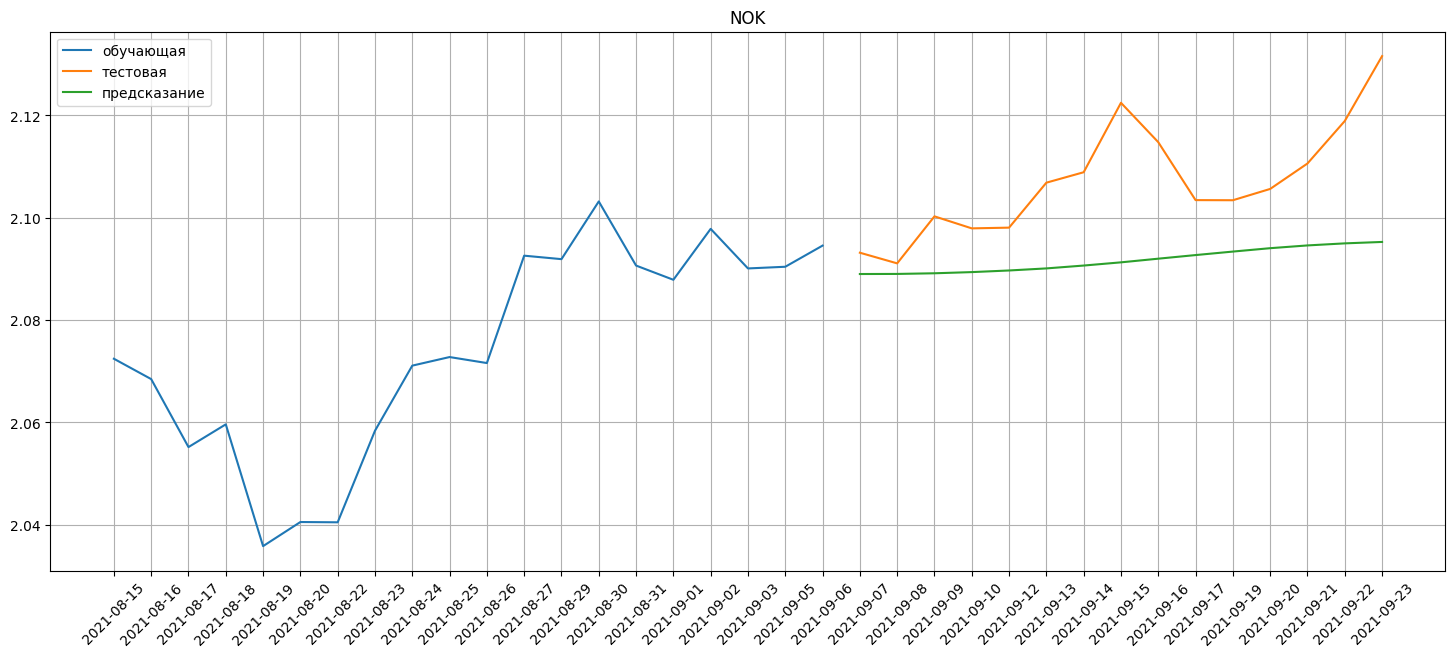


======================================== INR ========================================
2023-11-09 07:54:07,796 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.6 MiB
2023-11-09 07:54:07,801 - ApiComposer - Initial pipeline was fitted in 14.6 sec.
2023-11-09 07:54:07,805 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 07:54:07,830 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 18 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 08:04:24,957 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [10:17<?, ?gen/s]

2023-11-09 08:04:24,998 - ApiComposer - Hyperparameters tuning started with 7 min. timeout


2023-11-09 08:05:47,570 - PipelineTuner - Initial pipeline: {'depth': 11, 'length': 12, 'nodes': [treg, gbr, ridge, ridge, glm, data_source_ts/INR, ridge, lagged, rfr, decompose, linear, decompose]}
treg - {}
gbr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
rfr - {'n_jobs': -1}
decompose - {}
linear - {}
decompose - {} 
Initial metric: 0.001
 70%|███████   | 7/10 [07:53<03:22, 67.65s/trial, best loss: 0.000657171010683779]
2023-11-09 08:13:41,193 - PipelineTuner - Tuner stopped after initial search due to the lack of time
2023-11-09 08:15:00,183 - PipelineTuner - Final pipeline: {'depth': 11, 'length': 12, 'nodes': [treg, gbr, ridge, ridge, glm, data_source_ts/INR, ridge, lagged, rfr, decompose, linear, decompose]}
treg - {}
gbr - {}
ridge - {}
ridge - {}
glm - {'family': 'gaussian', 'link': 'identity'}
data_source_ts/INR - {}
ridge - {}
lagged - {'window_size': 10}
rfr - {'n_jobs': -1}
decom

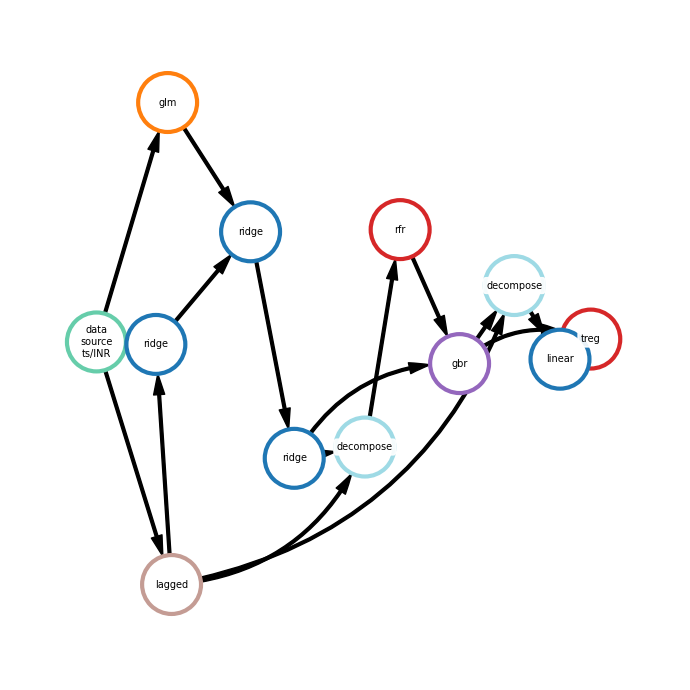

[0.25169529 0.25182322 0.25201965 0.25235158 0.25254407 0.25273317
 0.25296487]
{'mae': 0.001, 'mape': 0.002}


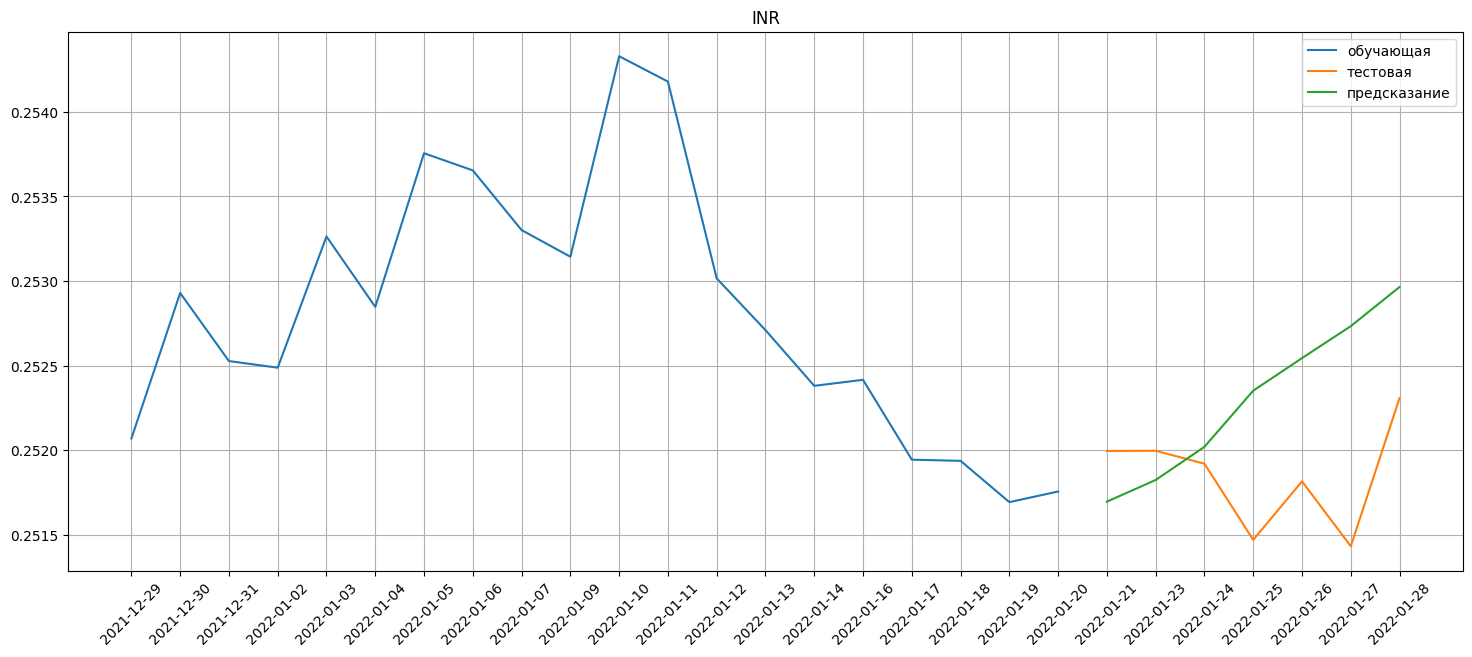


======================================== TRY ========================================
2023-11-09 08:17:17,042 - AssumptionsHandler - Memory consumption for fitting of the initial pipeline in main session: current 1.1 MiB, max: 2.7 MiB
2023-11-09 08:17:17,047 - ApiComposer - Initial pipeline was fitted in 12.7 sec.
2023-11-09 08:17:17,052 - AssumptionsHandler - Preset was changed to best_quality due to fit time estimation for initial model.
2023-11-09 08:17:17,077 - ApiComposer - AutoML configured. Parameters tuning: True. Time limit: 47 min. Set of candidate models: ['ts_naive_average', 'ar', 'smoothing', 'glm', 'locf', 'diff_filter', 'polyfit', 'arima', 'sparse_lagged', 'gaussian_filter', 'cut', 'stl_arima', 'ets', 'lagged', 'clstm', 'rfr', 'adareg', 'normalization', 'scaling', 'linear', 'ridge', 'glm', 'pca', 'exog_ts', 'fast_ica', 'svr', 'lasso', 'ransac_lin_reg', 'clstm', 'ar', 'dtreg', 'locf', 'arima', 'treg', 'ets', 'polyfit', 'gbr', 'lagged', 'isolation_forest_reg', 'ransac_non

Generations:   0%|          | 1/10000 [00:00<?, ?gen/s]/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_power link alias is deprecated. Use InversePower instead. The inverse_power link alias will be removed after the 0.15.0 release.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The inverse_squared link alias is deprecated. Use InverseSquared instead. The inverse_squared link alias will be removed after the

2023-11-09 08:44:26,344 - GroupedCondition - Optimisation stopped: Time limit is reached


Generations:   0%|          | 1/10000 [27:09<?, ?gen/s]

2023-11-09 08:44:26,373 - ApiComposer - Hyperparameters tuning started with 20 min. timeout


2023-11-09 08:45:07,336 - PipelineTuner - Initial pipeline: {'depth': 6, 'length': 7, 'nodes': [gbr, ridge, arima, data_source_ts/TRY, lagged, linear, decompose]}
gbr - {}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/TRY - {}
lagged - {'window_size': 10}
linear - {}
decompose - {} 
Initial metric: 0.009
  0%|          | 21/100000 [13:34<2055:52:46, 74.03s/trial, best loss: 0.01617582130725128]
2023-11-09 09:06:31,241 - PipelineTuner - Final pipeline: {'depth': 6, 'length': 7, 'nodes': [gbr, ridge, arima, data_source_ts/TRY, lagged, linear, decompose]}
gbr - {}
ridge - {}
arima - {'p': 2, 'd': 0, 'q': 2}
data_source_ts/TRY - {}
lagged - {'window_size': 10}
linear - {}
decompose - {}
2023-11-09 09:06:31,246 - PipelineTuner - Final metric: 0.009
2023-11-09 09:06:31,251 - ApiComposer - Hyperparameters tuning finished
2023-11-09 09:06:31,840 - ApiComposer - Model generation finished
2023-11-09 09:07:18,569 - FEDOT logger - Final pipeline was fitted
2023-11-09 09:07:18,574 - FE

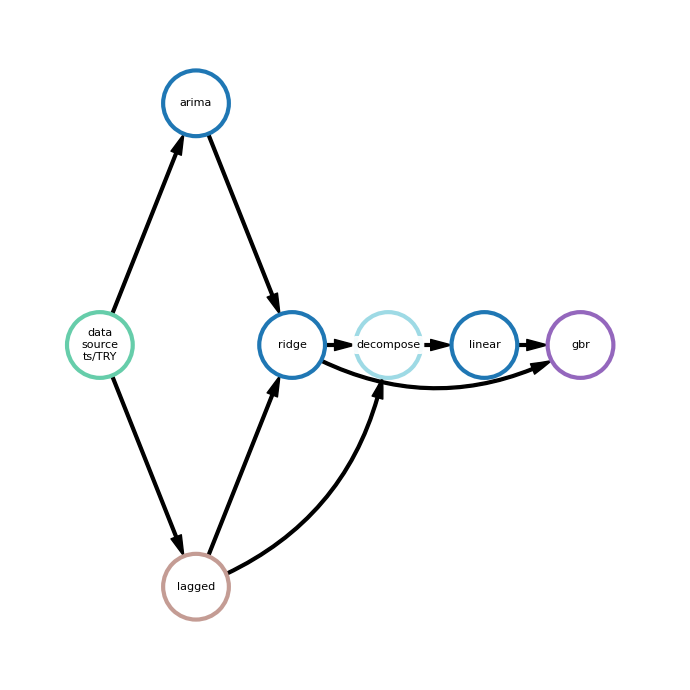

[2.14765285 2.14780425 2.14687217 2.14629995 2.14794049 2.14624295
 2.14952302 2.1598262 ]
{'mae': 0.013, 'mape': 0.006}


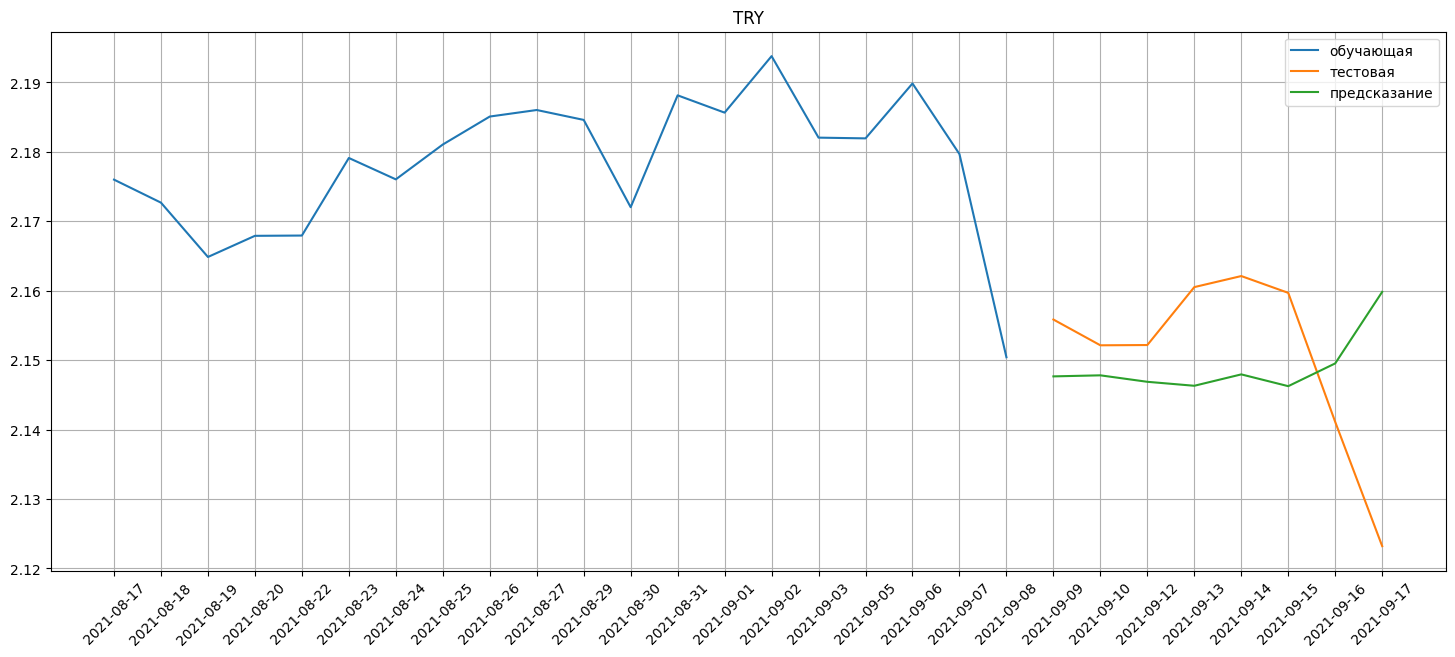

In [7]:
start_time = time.time()

while True:
    
    item = {}
    item['time'] = time.localtime()
    
    print()
    
    elapsed_time = time.time() - start_time
    
    if elapsed_time > 6*60*60:
        break
    
    target_name = random.choice(abscur_data.columns)
    print('='*40, target_name, '='*40)
    
    item['target_name'] = target_name
    
    forecast_length = random.randint(2,20)
    item['forecast_length'] = forecast_length
    
    # случайный сдвиг назад (случайная точка)
    
    delta = random.randint(0,1000-1)
    item['delta'] = delta
    
    # Сборка датасета
    
    target_train = np.ravel(abscur_data[target_name].values[:-forecast_length-delta])
    target_test = np.ravel(abscur_data[target_name].values[-forecast_length-delta:-delta])
    
    item['target_test'] = target_test

    idx_train = abscur_data.index[:-forecast_length-delta]
    idx_test = abscur_data.index[-forecast_length-delta:-delta]
    
    item['idx_test'] = list(idx_test)
    
    historical_data_inp = {}

    inp_name = target_name
    
    historical_data_inp[inp_name] = target_train
            
    # Сборка модели
    
    timeout = random.randint(1,60)
    item['timeout'] = timeout
    
    fedot = Fedot(problem='ts_forecasting',
                  task_params=TsForecastingParams(forecast_length=forecast_length),
                  timeout=timeout)
    
    # Обучение модели
    
    fedot.fit(features=historical_data_inp,
              target=historical_data_inp[target_name])
    
    # Вид сети
    
    fedot.current_pipeline.show()
    model_struct_file = target_name + '_' + str(len(history)) + '_model.png'
    fedot.current_pipeline.show(save_path=model_struct_file)
    item['model_struct_file'] = model_struct_file
    
    model_struct = fedot.current_pipeline.structure
    item['model_struct'] = model_struct
    
    # Предсказание
    
    forecast = fedot.predict(historical_data_inp,in_sample=False)
    print(forecast)
    item['forecast'] = forecast
    
    # Расчет метрик
    
    metrics = fedot.get_metrics(target_test,metric_names=['mae','mape'])
    print(metrics)
    item['metrics'] = metrics
    
    # График
    
    plt.plot(idx_train[-20:],target_train[-20:],label='обучающая')
    plt.plot(idx_test,target_test,label='тестовая')
    plt.plot(idx_test,forecast,label='предсказание')
    plt.grid()
    plt.legend()
    plt.title(target_name)
    plt.xticks(rotation=45)
    
    plot_file = target_name + '_' + str(len(history)) + '_plot.png'
    plt.savefig(plot_file)
    item['plot_file'] = plot_file
    
    plt.show()
    
    history.append(item)
    
#     break

with open("history.pickle", "wb") as file:
    pickle.dump(history, file)

# Аналитика

In [8]:
rep = pd.DataFrame()
rep['time'] = list(item['time'] for item in history)
rep['target_name'] = list(item['target_name'] for item in history)
rep['forecast_length'] = list(item['forecast_length'] for item in history)
rep['delta'] = list(item['delta'] for item in history)
rep['timeout'] = list(item['timeout'] for item in history)
rep['mape'] = list(item['metrics']['mape'] for item in history)
rep

,time,target_name,forecast_length,delta,timeout,mape
0,"(2023, 11, 5, 18, 12, 27, 6, 309, 0)",AED,10,942,1,0.004
1,"(2023, 11, 5, 18, 16, 20, 6, 309, 0)",ZAR,10,583,1,0.011
2,"(2023, 11, 5, 18, 17, 52, 6, 309, 0)",MYR,10,216,1,0.010
3,"(2023, 11, 5, 18, 19, 45, 6, 309, 0)",QAR,10,307,1,0.011
4,"(2023, 11, 5, 18, 21, 29, 6, 309, 0)",COP,10,633,1,0.106
...,...,...,...,...,...,...
72,"(2023, 11, 9, 6, 43, 26, 3, 313, 0)",CHF,4,430,33,0.007
73,"(2023, 11, 9, 7, 16, 52, 3, 313, 0)",SGD,14,199,17,0.004
74,"(2023, 11, 9, 7, 35, 58, 3, 313, 0)",NOK,15,665,17,0.007
75,"(2023, 11, 9, 7, 53, 45, 3, 313, 0)",INR,7,556,18,0.002


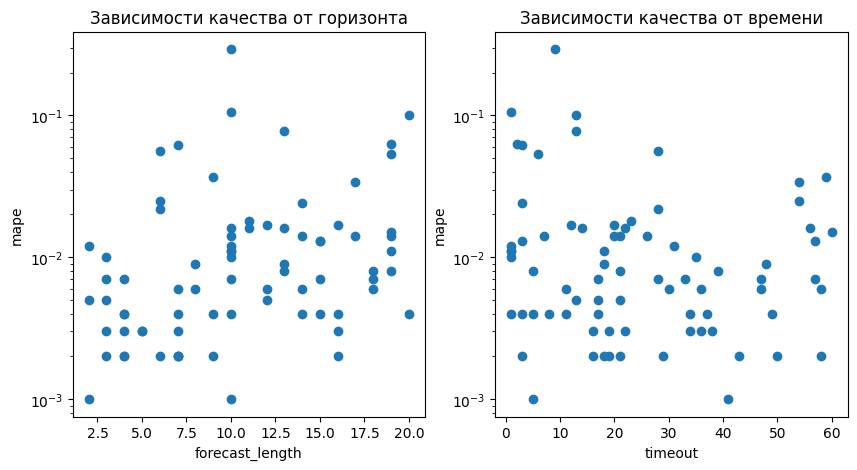

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(rep['forecast_length'],rep['mape'])
ax[0].semilogy()
ax[0].set_xlabel('forecast_length')
ax[0].set_ylabel('mape')
ax[0].set_title('Зависимости качества от горизонта')

ax[1].scatter(rep['timeout'],rep['mape'])
ax[1].semilogy()
ax[1].set_xlabel('timeout')
ax[1].set_ylabel('mape')
ax[1].set_title('Зависимости качества от времени')

plt.show()